<a href="https://colab.research.google.com/github/AndresNei20/Sprint-3-Nearst-Neighbours/blob/main/Sprint_3_Andres_Neira_Paola_Velasquez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sprint 3 - Recomendación
**Interacción Sociotecnológica**
**Jose Andres Moncada Quintero**
En este ejercicio vamos a implementar un sistema muy simple de recomendación de personas
y de características usando el algoritmo K Nearest Neighbours (KNN). Este algoritmo es
1
bastante común en sistemas de interacción socio tecnológica para encontrar usuarios similares
basados en sus gustos. Lo que necesitamos para implementar el algoritmo es una lista de
usuarios (filas) y sus gustos o características (columnas). Cada característica va en una
columna diferente y, por simplicidad, está calificada en la misma escala (i.e. de 0 a 1). La idea
es que, a través de las características, podamos encontrar personas similares. La hipótesis
básica es: “dos usuarios son similares en la medida en que sus características son similares”
En este ejercicio vamos a revisar algunas ideas nuevas:
● usuario
● características
● vector de características
● distancia
● vecindario de usuarios
● fuerza del vínculo
1. Crear entre todo el grupo una lista de ingredientes de pizza que estén en un menú de un
restaurante famoso de la ciudad. Todos los miembros del salón llenamos una encuesta de
ingredientes dándole un valor a todos los ingredientes entre 1 y 10. 1= No me gusta, 10= me
encanta.

2. Una vez que todos llenemos la encuesta, creamos un programa de computador para calcular
la Distancia entre un usuario y los demás. Para esto típicamente se usa la distancia Coseno,
(realizada en el sprint anterior) que consiste en usar el vector de características (todas las
respuestas de las características de cada usuario) para medir la distancia entre dos usuarios.

3. Luego, seleccionamos un valor arbitrario de K vecinos (usualmente la raiz cuadrada del
número total de usuarios) y con este valor encontramos los K vecinos más cercanos a cada
usuario. Es decir escogemos los K usuarios que están a menor distancia del usuario
seleccionado. Finalmente, presentamos el usuario seleccionado, sus K vecinos más cercanos y
la distancia entre el usuario y sus vecinos cercanos.

4. La entrega de este ejercicio es un algoritmo funcional cuyas entradas son: el nombre P de
una persona del grupo y el valor de K. La salida es el “vecindario de usuarios” o el grupo de K
usuarios más cercanos a la persona P de toda la base de datos, indicando el valor de distancia
o la “fuerza del vínculo”.

5. Reflexionar qué influencia tiene el algoritmo KNN en un sistema de recomendación en el
contexto pospuesto de una pizzería. Identificar por lo menos un contexto nuevo en el cual este
algoritmo pueda ser utilizado provechosamente para realizar decisiones para grupos. Para esta
reflexión debemos pensar que P, dependiendo de la base de datos, no necesariamente es una
persona, también puede ser un producto o un servicio.
6. Bonus: Quien entregue un ejercicio en donde la fuerza del vínculo entre P y los miembros de K
se manifieste de manera espacial y no (solo) numérica, tiene 0.5 más en el ejercicio final de la
unidad 3 (que vale el 40% del curso).

1.

# IMPORTAR LIBRERÍAS

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display, clear_output
import networkx as nx

# LECTURA DE LOS DATOS

In [13]:
df = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQnVeQDEcpRRstFD_DwuFSqB8itOSXOBaIjMKgj9zymz7bbWAcJL_q1ZoYUkh-_s082fSHdzSHSoZq_/pub?gid=0&single=true&output=csv")
df.set_index('Nombre completo', inplace=True)
print(df)

                    Nombre completo  Pepperoni  Jamón  Pollo  Chorizo  \
0               Isaac Calle Cardozo         10      7      6        9   
1                      Andres Neira         10     10     10       10   
2                  Juan David Avila         10      9      6       10   
3                    Santiago Perez         10      6      4       10   
4                     Eduardo Mejia         10     10      7        9   
5              Juan Sebastián Silva         10     10      1        2   
6                Sebastian Gonzalez         10     10      1        5   
7                      Jaime Vargas         10      5      6        6   
8                  Sebastian Romero         10      8      8        8   
9   Lina Isabella Manjarrez Pantoja         10      9      9       10   
10                 Juan Pablo Marín          8     10      6       10   
11          Santiago Cuadros Mateus          7     10      7        7   
12                Alejandra Ordoñez         10     

# 2. Similitud Coseno

In [20]:
usuarios = list(df.index)
dropdown_usuario1 = widgets.Dropdown(options=usuarios, description="Usuario A:")
dropdown_usuario2 = widgets.Dropdown(options=usuarios, description="Usuario B:")

display(dropdown_usuario1, dropdown_usuario2)

def similitud_coseno(usuario_A, usuario_B):
    producto_punto = np.dot(usuario_A, usuario_B)
    norma_A = np.linalg.norm(usuario_A)
    norma_B = np.linalg.norm(usuario_B)
    return producto_punto / (norma_A * norma_B)

def calcular_similitud(usuario1, usuario2):
    if usuario1 == usuario2:
        print("Por favor selecciona dos usuarios diferentes.")
        return
    usuario_A = df.loc[usuario1]
    usuario_B = df.loc[usuario2]
    similitud = similitud_coseno(usuario_A, usuario_B)
    print(f"Similitud entre {usuario1} y {usuario2}: {similitud:.4f}")

boton_calcular = widgets.Button(description="Calcular Similitud")
output = widgets.Output()

def on_button_click(b):
    with output:
        output.clear_output()
        calcular_similitud(dropdown_usuario1.value, dropdown_usuario2.value)

boton_calcular.on_click(on_button_click)

display(boton_calcular, output)


Dropdown(description='Usuario A:', options=('Isaac Calle Cardozo', 'Andres Neira', 'Juan David Avila', 'Santia…

Dropdown(description='Usuario B:', options=('Isaac Calle Cardozo', 'Andres Neira', 'Juan David Avila', 'Santia…

Button(description='Calcular Similitud', style=ButtonStyle())

Output()

Puntos 2, 3, 4 y Bonus: Quien entregue un ejercicio en donde la fuerza del vínculo entre P y los miembros de K se manifieste de manera espacial y no (solo) numérica, tiene 0.5 más en el ejercicio final de la unidad 3 (que vale el 40% del curso).

Dropdown(description='Usuario:', index=20, options=('Isaac Calle Cardozo', 'Andres Neira', 'Juan David Avila',…

Button(button_style='primary', description='Actualizar Comparación', style=ButtonStyle())

Datos del usuario seleccionado:
Pepperoni           10
Jamón                8
Pollo                8
Chorizo              7
Tocineta             9
Champiñones          6
Pimientos            6
Cebolla              5
Maíz tierno         10
Jalapeños            7
Piña                 6
Aceitunas negras     8
Ciruela              1
Tomate               8
Queso               10
Maduro               1
Salami              10
Burrata             10
Name: Monk, dtype: int64

Vecino: Andres Neira, Similitud: 0.9367
Vecino: Jaime Vargas, Similitud: 0.9331
Vecino: Juan David Avila, Similitud: 0.9002
Vecino: Andrea Oviedo, Similitud: 0.8998
Vecino: Alejandra Ordoñez, Similitud: 0.8951


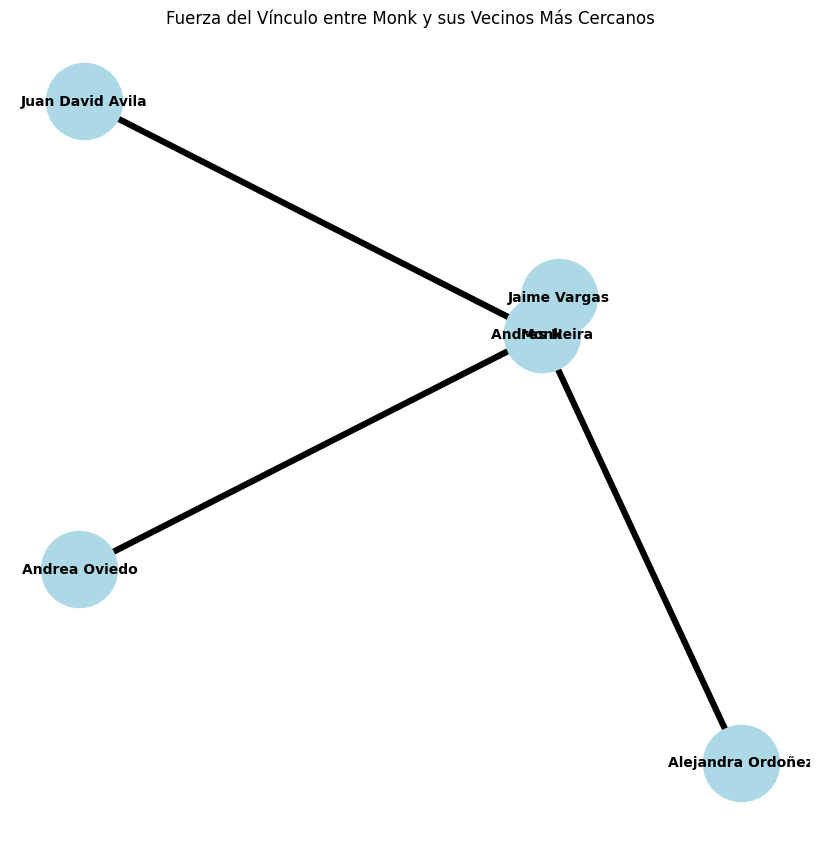

In [58]:
dropdown = widgets.Dropdown(
    options=df.index,
    description='Usuario:',
    value='Monk'
)

boton_actualizar = widgets.Button(
    description="Actualizar Comparación",
    button_style="primary"
)

def actualizar_grafico(_):
    clear_output(wait=True)
    display(dropdown, boton_actualizar)

    usuario_seleccionado = dropdown.value
    distancias = {}

    usuario_datos = df.loc[usuario_seleccionado]
    print(f"Datos del usuario seleccionado:\n{usuario_datos}\n")

    for usuario in df.index:
        if usuario != usuario_seleccionado:
            distancias[usuario] = similitud_coseno(usuario_datos, df.loc[usuario])

    K = 5
    vecinos_mas_cercanos = sorted(distancias, key=distancias.get, reverse=True)[:K]

    for vecino in vecinos_mas_cercanos:
        print(f"Vecino: {vecino}, Similitud: {distancias[vecino]:.4f}")

    G = nx.Graph()

    G.add_node(usuario_seleccionado, pos=(0, 0))

    max_similitud = max(distancias.values())
    min_similitud = min(distancias.values())

    for i, vecino in enumerate(vecinos_mas_cercanos):
        similitud = distancias[vecino]
        distancia_normalizada = 1 - (similitud - min_similitud) / (max_similitud - min_similitud)
        distancia = 2 * distancia_normalizada

        angle = 2 * np.pi * i / K
        x = distancia * np.cos(angle)
        y = distancia * np.sin(angle)

        G.add_node(vecino, pos=(x, y))

        G.add_edge(usuario_seleccionado, vecino, weight=distancias[vecino])

    pos = nx.get_node_attributes(G, 'pos')

    plt.figure(figsize=(8, 8))
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", font_size=10, font_weight="bold")

    edges = G.edges(data=True)
    nx.draw_networkx_edges(G, pos, edgelist=edges, width=[5 * edge[2]['weight'] for edge in edges])

    plt.title(f"Fuerza del Vínculo entre {usuario_seleccionado} y sus Vecinos Más Cercanos")
    plt.show()

boton_actualizar.on_click(actualizar_grafico)

display(dropdown, boton_actualizar)

# 5.

El algoritmo KNN (K-Nearest Neighbors) resulta especialmente práctico en sistemas de recomendación, ya que permite identificar elementos similares a uno principal, como usuarios, productos o servicios. Al encontrar similitudes, KNN facilita mostrar recomendaciones más personalizadas y cercanas a los intereses del usuario.

En el caso de una pizzería, como en el proyecto de este sprint, KNN puede ayudar mucho a mejorar la personalización de recomendaciones. Si un cliente, por ejemplo, pide frecuentemente pizzas con ciertos ingredientes, el sistema podría sugerirle opciones parecidas que no ha probado, pero que se alinean con su gusto. Además, si se identifican patrones de preferencias en grupos grandes de clientes, podrían crearse combos o promociones adaptadas a esos gustos compartidos.

Este enfoque también funciona muy bien en una app de compras, donde al analizar los productos que alguien compra, el sistema puede recomendar artículos parecidos que tengan características que podrían interesarle y animarlo a regresar.

En definitiva, KNN es ideal para agrupar elementos similares a uno en específico, lo que lo convierte en una herramienta muy útil para construir recomendaciones relevantes y efectivas en distintos contextos.